In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime       #时间特征相关计算
import gc             #del某个变量后 通过gc.collect()收集垃圾释放系统内存

In [3]:
%%time
df_hist_trans = pd.read_csv('new_merchant_transactions.csv',parse_dates=['purchase_date'])

CPU times: user 4.43 s, sys: 268 ms, total: 4.7 s
Wall time: 4.7 s


In [8]:
df_train.nunique()

first_active_month        75
card_id               201917
feature_1                  5
feature_2                  3
feature_3                  2
target                197110
dtype: int64

In [14]:
df_hist_trans.isna().sum()/df_hist_trans.shape[0]

authorized_flag         0.000000
card_id                 0.000000
city_id                 0.000000
category_1              0.000000
installments            0.000000
category_3              0.028488
merchant_category_id    0.000000
merchant_id             0.013355
month_lag               0.000000
purchase_amount         0.000000
purchase_date           0.000000
category_2              0.056925
state_id                0.000000
subsector_id            0.000000
dtype: float64

In [9]:
df_hist_trans.nunique(dropna=False)

authorized_flag               1
card_id                  290001
city_id                     308
category_1                    2
installments                 15
category_3                    4
merchant_category_id        314
merchant_id              226130
month_lag                     2
purchase_amount           75190
purchase_date           1667025
category_2                    6
state_id                     25
subsector_id                 41
dtype: int64

In [4]:
df_train = pd.read_csv('train.csv',parse_dates=['first_active_month'])
df_test = pd.read_csv('test.csv',parse_dates=['first_active_month'])

In [5]:
df_train.isna().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [6]:
df_train.nunique()

first_active_month        75
card_id               201917
feature_1                  5
feature_2                  3
feature_3                  2
target                197110
dtype: int64

---

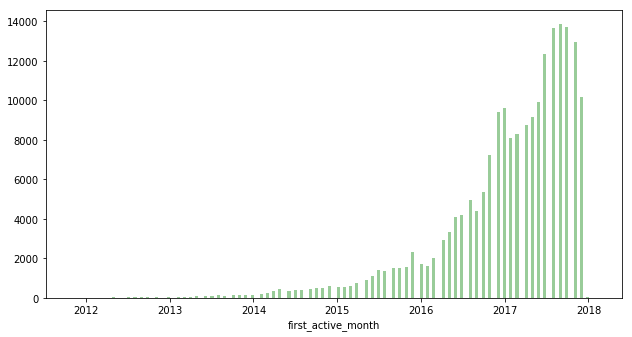

In [15]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,1,1))
sns.distplot(df_train['first_active_month'], bins =170,kde=False,color='green')

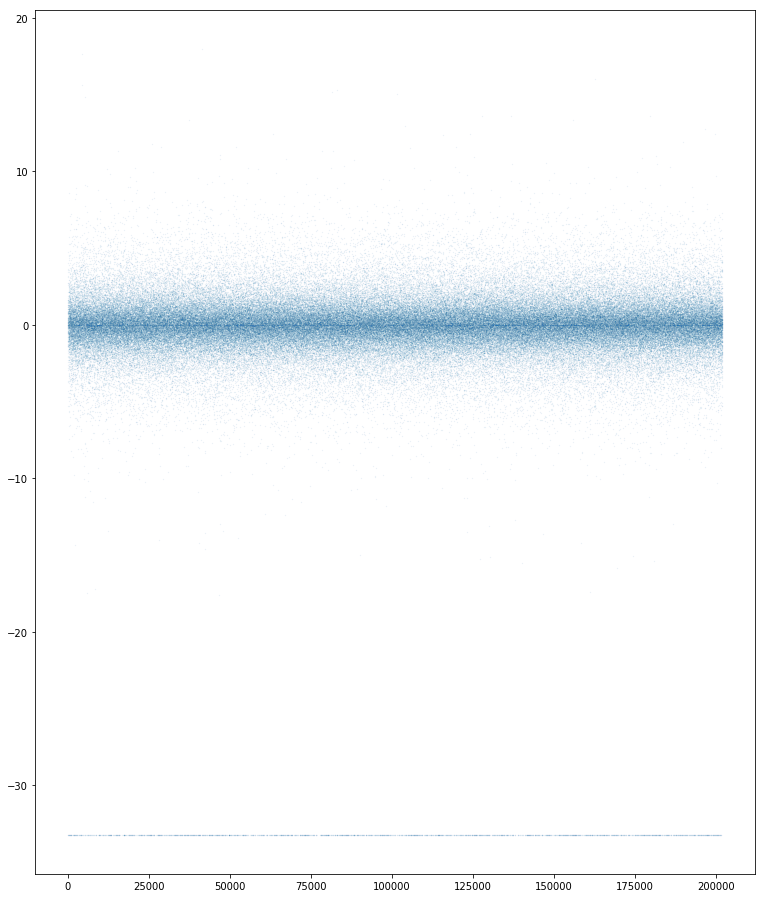

In [19]:
#target 顺序已经被打乱
fig = plt.figure(figsize=(10,12))
ax = fig.add_axes([0,0,1,1])
plt.scatter(x=range(len(df_train)),y=df_train.target,s=0.03,alpha=0.2)

---

In [15]:
df_merge_hist = pd.merge(df_hist_trans,df_train,how='left',on='card_id')

In [16]:
df_merge_hist = df_merge_hist[-df_merge_hist['target'].isna()]

In [17]:
df_merge_hist.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,first_active_month,feature_1,feature_2,feature_3,target
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29,2016-08-01,1.0,1.0,0.0,-4.839243
5,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633007,2018-04-02 12:53:28,1.0,9,16,2016-08-01,1.0,1.0,0.0,-4.839243
6,Y,C_ID_ef55cf8d4b,69,N,1,B,333,M_ID_6d061b5ddc,1,5.263697,2018-03-28 19:50:19,1.0,9,10,2016-08-01,1.0,1.0,0.0,-4.839243
7,Y,C_ID_ef55cf8d4b,231,N,1,B,307,M_ID_df1e022f41,2,-0.553787,2018-04-05 08:06:52,1.0,9,19,2016-08-01,1.0,1.0,0.0,-4.839243
8,Y,C_ID_ef55cf8d4b,69,N,1,B,278,M_ID_d15eae0468,2,-0.596643,2018-04-07 18:37:40,1.0,9,37,2016-08-01,1.0,1.0,0.0,-4.839243


In [18]:
df_merge_hist.isna().sum()/df_merge_hist.shape[0]

authorized_flag         0.000000
card_id                 0.000000
city_id                 0.000000
category_1              0.000000
installments            0.000000
category_3              0.028437
merchant_category_id    0.000000
merchant_id             0.013340
month_lag               0.000000
purchase_amount         0.000000
purchase_date           0.000000
category_2              0.056614
state_id                0.000000
subsector_id            0.000000
first_active_month      0.000000
feature_1               0.000000
feature_2               0.000000
feature_3               0.000000
target                  0.000000
dtype: float64

In [19]:
df_hist_trans.isna().sum()/df_hist_trans.shape[0]

authorized_flag         0.000000
card_id                 0.000000
city_id                 0.000000
category_1              0.000000
installments            0.000000
category_3              0.028488
merchant_category_id    0.000000
merchant_id             0.013355
month_lag               0.000000
purchase_amount         0.000000
purchase_date           0.000000
category_2              0.056925
state_id                0.000000
subsector_id            0.000000
dtype: float64

In [20]:
df_merge_hist['month_diff1'] = ((datetime.datetime.today() - df_merge_hist['purchase_date']).dt.days)//30
df_merge_hist['month_diff1'] += df_merge_hist['month_lag']

In [21]:
df_merge_hist['outliers'] = df_merge_hist['target']<=-30

In [23]:
df_merge_hist.shape

(1219685, 21)

In [22]:
df_merge_hist.head(30)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,category_2,state_id,subsector_id,first_active_month,feature_1,feature_2,feature_3,target,month_diff1,outliers
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,...,NaN,-1,29,2016-08-01,1.0,1.0,0.0,-4.839243,11,False
5,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633007,...,1.0,9,16,2016-08-01,1.0,1.0,0.0,-4.839243,11,False
6,Y,C_ID_ef55cf8d4b,69,N,1,B,333,M_ID_6d061b5ddc,1,5.263697,...,1.0,9,10,2016-08-01,1.0,1.0,0.0,-4.839243,11,False
7,Y,C_ID_ef55cf8d4b,231,N,1,B,307,M_ID_df1e022f41,2,-0.553787,...,1.0,9,19,2016-08-01,1.0,1.0,0.0,-4.839243,11,False
8,Y,C_ID_ef55cf8d4b,69,N,1,B,278,M_ID_d15eae0468,2,-0.596643,...,1.0,9,37,2016-08-01,1.0,1.0,0.0,-4.839243,11,False
9,Y,C_ID_ef55cf8d4b,69,N,1,B,437,M_ID_5f9bffd028,1,-0.607191,...,1.0,9,15,2016-08-01,1.0,1.0,0.0,-4.839243,11,False
10,Y,C_ID_ef55cf8d4b,69,N,-1,NaN,45,M_ID_3ffd43b4cd,1,4.452265,...,1.0,9,18,2016-08-01,1.0,1.0,0.0,-4.839243,11,False
11,Y,C_ID_ef55cf8d4b,69,N,1,B,108,M_ID_e6f5213fbf,1,-0.605959,...,1.0,9,34,2016-08-01,1.0,1.0,0.0,-4.839243,11,False
12,Y,C_ID_ef55cf8d4b,69,N,1,B,278,M_ID_aa97bc87f6,1,-0.634209,...,1.0,9,37,2016-08-01,1.0,1.0,0.0,-4.839243,11,False
13,Y,C_ID_ef55cf8d4b,69,N,1,B,157,M_ID_28fbc8c74d,2,-0.492058,...,1.0,9,29,2016-08-01,1.0,1.0,0.0,-4.839243,11,False


In [44]:
df_merge_hist.category_3.value_counts(dropna=False)

A      9552206
B      7222525
C      1144765
NaN     110513
Name: category_3, dtype: int64

In [49]:
df_merge_hist.category_2.value_counts(dropna=False)

 1.0    9417553
 3.0    2426416
 5.0    2295169
NaN     1637392
 4.0    1617762
 2.0     635717
Name: category_2, dtype: int64

In [50]:
df_merge_hist.category_1.value_counts(dropna=False)

N    16741908
Y     1288101
Name: category_1, dtype: int64

In [25]:
df_merge_hist.installments.value_counts(dropna=False)

 0      572861
 1      519792
-1       34684
 2       34007
 3       27675
 4        9303
 6        6396
 5        5870
 10       5476
 12       1756
 8         992
 7         532
 9         300
 11         40
 999         1
Name: installments, dtype: int64

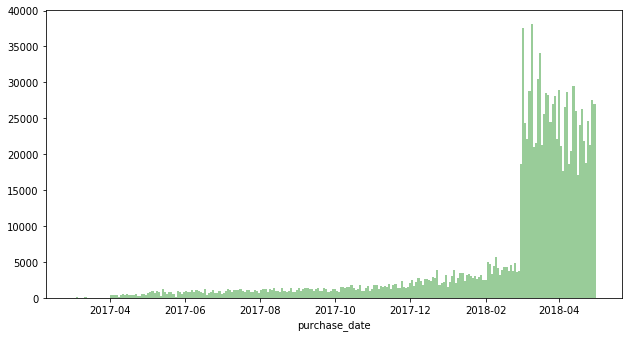

In [26]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,1,1))
sns.distplot(df_merge_hist['purchase_date'], bins =250,kde=False,color='green')

In [28]:
from scipy import stats

In [29]:
df_month_diff1 = df_merge_hist[['target','month_diff1','card_id','outliers']].groupby('card_id').agg({'outliers':'mean','month_diff1':(lambda x: stats.mode(x)[0][0]),'target':'mean'})

In [30]:
df_month_diff1.reset_index(inplace=True)

In [31]:
df_month_diff1.head()

,card_id,outliers,month_diff1,target
0,C_ID_00007093c1,False,11,0.134077
1,C_ID_0001506ef0,False,11,0.884295
2,C_ID_000183fdda,False,11,-0.264433
3,C_ID_0002c7c2c1,False,12,1.288514
4,C_ID_0003be3c83,False,11,-0.083268


In [32]:
plt_data = df_month_diff1.groupby('month_diff1').target.mean()

In [33]:
plt_data = plt_data.reset_index()

In [34]:
plt_data

,month_diff1,target
0,11,-0.126482
1,12,-0.525303
2,13,-1.674195
3,14,-1.923288
4,15,-1.744268
5,16,-1.165700
6,17,-1.099461
7,18,-1.498817
8,19,-1.434299
9,20,-0.909778


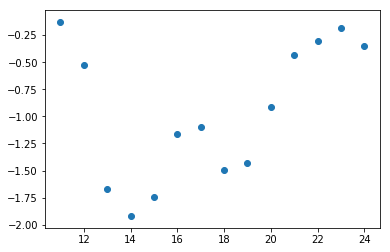

In [35]:
plt.scatter(x=plt_data.month_diff1,y=plt_data.target)

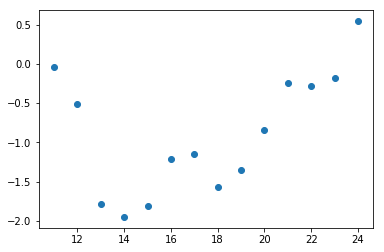

In [88]:
plt.scatter(x=plt_data.month_diff1,y=plt_data.target)

In [105]:
df_merge_hist.state_id.value_counts(dropna=False)/df_merge_hist.shape[0]

 9     0.363845
-1     0.090815
 16    0.073869
 15    0.071122
 5     0.056440
 19    0.041178
 20    0.038277
 22    0.032723
 21    0.032580
 4     0.029083
 11    0.022104
 13    0.021901
 7     0.021797
 3     0.018672
 18    0.013527
 12    0.013490
 2     0.012893
 1     0.008616
 10    0.007420
 24    0.007156
 23    0.006920
 14    0.006020
 8     0.005339
 17    0.003979
 6     0.000236
Name: state_id, dtype: float64

In [106]:
df_merge_hist.month_lag.value_counts(dropna=False)

-2     2389787
-1     2248468
 0     2151419
-3     1920958
-4     1635925
-5     1466671
-6     1271559
-7     1098685
-8      882416
-9      761224
-10     668862
-11     620200
-12     488207
-13     425628
Name: month_lag, dtype: int64

In [36]:
month_lag = df_merge_hist[['target','month_lag','card_id','outliers']].groupby('card_id').agg({'outliers':'mean','month_lag':(lambda x: stats.mode(x)[0][0]),'target':'mean'})

In [37]:
month_lag.reset_index(inplace=True)

In [38]:
month_lag.groupby('month_lag').target.mean()

month_lag
1   -0.577398
2   -0.247587
Name: target, dtype: float64

In [39]:
month_lag.month_lag.value_counts(dropna=False)

1    107109
2     72877
Name: month_lag, dtype: int64

In [40]:
plt_data_2 = month_lag.groupby('month_lag').target.mean()
plt_data_2 = plt_data_2.reset_index()

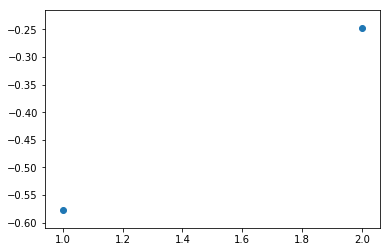

In [41]:
plt.scatter(x=plt_data_2.month_lag,y=plt_data_2.target)

In [42]:
purchase_date_ptp = df_merge_hist[['target','card_id','purchase_date','outliers']].groupby('card_id').agg({'outliers':'mean','purchase_date':np.ptp,'target':'mean'})

In [46]:
purchase_date_ptp.head(50)

,outliers,target,purchase_date
card_id,,,
C_ID_00007093c1,False,0.134077,6 days 05:10:24
C_ID_0001506ef0,False,0.884295,5 days 10:52:32
C_ID_000183fdda,False,-0.264433,59 days 02:33:27
C_ID_0002c7c2c1,False,1.288514,44 days 15:00:05
C_ID_0003be3c83,False,-0.083268,40 days 05:41:31
C_ID_00042d509c,False,-1.264398,12 days 16:56:43
C_ID_0004888ddd,False,0.512450,0 days 12:44:04
C_ID_0004b68c49,False,2.070528,34 days 11:52:41
C_ID_0004c2a5ab,False,-0.537806,49 days 01:42:20


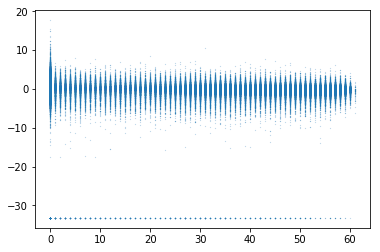

In [44]:
plt.scatter(x=purchase_date_ptp.purchase_date.dt.days,y=purchase_date_ptp.target,s=0.01)

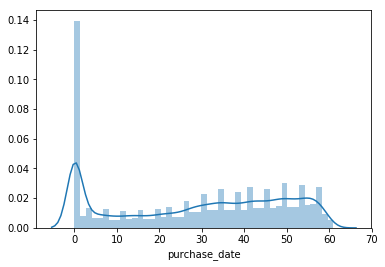

In [49]:
sns.distplot(purchase_date_ptp.purchase_date.dt.days)

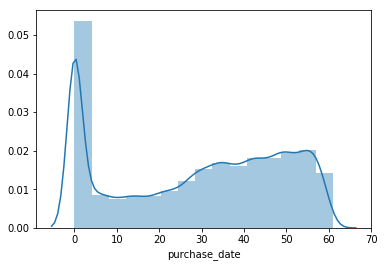

In [48]:
sns.distplot(purchase_date_ptp.purchase_date.dt.days,bins=15)

In [50]:
purchase_date_ptp['days_ptp'] = purchase_date_ptp.purchase_date.dt.days

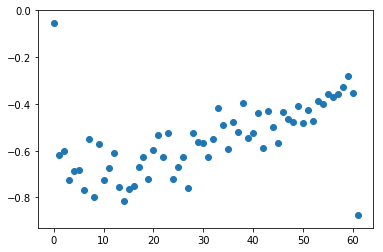

In [53]:
plt_data_3 = purchase_date_ptp.groupby('days_ptp').target.mean()
plt_data_3 = plt_data_3.reset_index()
plt.scatter(x=plt_data_3.days_ptp,y=plt_data_3.target)

In [56]:
purchase_date_ptp[purchase_date_ptp.days_ptp==61]

,outliers,target,purchase_date,days_ptp
card_id,,,,
C_ID_01841a102c,False,0.426421,61 days 07:50:51,61
C_ID_05bdc2d7bc,False,0.483641,61 days 01:05:00,61
C_ID_06d76bee94,False,0.001620,61 days 00:41:57,61
C_ID_08e36ea073,False,0.675714,61 days 07:54:23,61
C_ID_0e0197bcfc,False,-0.083951,61 days 04:50:44,61
C_ID_0e9a2a424e,False,-3.109531,61 days 14:07:00,61
C_ID_0f7d2ddeac,False,0.406835,61 days 13:36:35,61
C_ID_1b77114629,False,-0.260198,61 days 06:29:56,61
C_ID_20de82c923,False,-0.355644,61 days 11:16:00,61
